In [1]:
import tensorflow as tf
import keras as keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part(a) 
#### Use the load_breast_cancer() function from sklearn.datasets to load the breast cancer dataset.

In [2]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()

# Print the shape of the data
print("The shape of the data is: ", data.data.shape)

The shape of the data is:  (569, 30)


## Part(b) 
#### Convert the dataset into a pandas DataFrame using the pd.DataFrame() function. Make sure to specify columns= to display the feature names.

In [3]:
# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Get the mean concavity for observation 564
mean_concavity_564 = df.loc[563, "mean concavity"]
print("The mean concavity for observation 564: ", mean_concavity_564)
print(df.shape)

The mean concavity for observation 564:  0.3174
(569, 30)


## Part(c) 
#### Split the data into three sets: training, validation, and test sets. Use an 80-10-10 split. Use train_test_split() with the test_size parameter to first split the data into 80% training and 20% temporary data. Then split the temporary data again into 50% validation and 50% test data

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% temporary data
X_train, X_temp, y_train, y_temp = train_test_split(df, data.target, test_size=0.2, random_state=42)

# Split the temporary data into 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the three datasets
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (455, 30)
Validation data shape: (57, 30)
Test data shape: (57, 30)


## Part(d)
#### Standardize the training, validation, and test datasets using StandardScaler. Fit the scaler on the training data and transform the training dataset using fit_transform. Apply transform to both validation and test dataset using the same scaler fitted on the training data.ta.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler and apply transformation on trianing, validation and test dataset
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Part(e)
#### Create a feedforward neural network (FNN) using tensorflow.keras (or keras): The network should include one hidden layer with 16 neurons and ReLU activation and an output layer with 1 neuron and Sigmoid activation for binary classification.

In [6]:
from tensorflow.keras import layers, models

# Build the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape=(30,), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

C:\Users\valha\anaconda3\envs\stat_479\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Part(f)
#### Compile the model using binary_crossentropy loss function, Adam optimizer, and tTrack accuracy during training.

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

## Part (g)
#### Train the model for 100 epochs, but include the validation data during training by passing the validation_data argument to model.fit(). Use the training data for training and validation data for monitoring overfitting. Record the loss and accuracy for both training and validation data at each epoch

In [8]:
# Train the model for 100 epochs with validation data
history = model.fit(
    X_train_scaled, y_train, 
    epochs=100, 
    validation_data=(X_val_scaled, y_val)
)

# Retrieve the recorded history for loss and accuracy
history_dict = history.history
print(history_dict.keys())

# Get the validation accuracy after 100 epochs
val_accuracy = history.history['val_accuracy'][-1]
print("Validation Accuracy after 100 epochs: {:.4f}".format(val_accuracy))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3595 - loss: 0.8481 - val_accuracy: 0.7544 - val_loss: 0.5721
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6919 - loss: 0.5942 - val_accuracy: 0.8246 - val_loss: 0.4414
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4884 - val_accuracy: 0.8421 - val_loss: 0.3607
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8812 - loss: 0.3771 - val_accuracy: 0.8947 - val_loss: 0.3038
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9147 - loss: 0.3185 - val_accuracy: 0.9123 - val_loss: 0.2627
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9043 - loss: 0.2865 - val_accuracy: 0.9123 - val_loss: 0.2330
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9272 - loss: 0.2445 - val_accuracy: 0.9123 - val_loss: 0.2090
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9471 - loss: 0.2093 - val_accuracy: 0.9123 - v

## Part(h)

#### After training, plot the training loss and validation loss over the 100 epochs, and use this plot to visually determine the point at which the model begins to overfitt

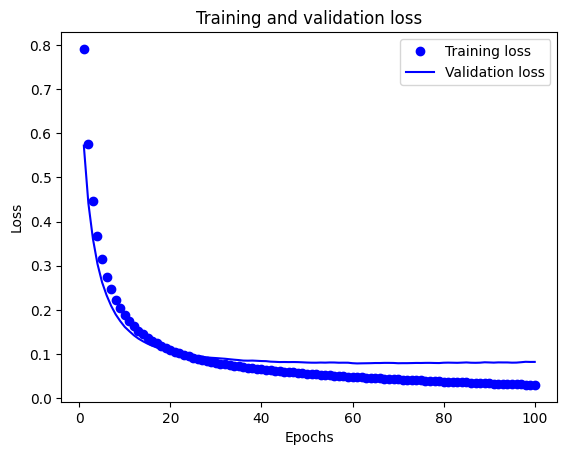

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### The optimal epochs is 70, because at epoch 70 the validation curves starts to increase. Besides, the model starts to overfit after 56 epochs.

## Part (i) According to (h), rebuild your FNN

In [10]:
# Build the feedforward neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape=(X_train_scaled.shape[1],), activation='relu'),  # hidden layer with 16 neurons
    tf.keras.layers.Dense(1, activation='sigmoid')  # output layer with Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for the optimal 70 epochs with validation data
history = model.fit(
    X_train_scaled, y_train, 
    epochs=70,
    validation_data=(X_val_scaled, y_val)
)

# Optionally, you can also evaluate the model on the test set after training
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Epoch 1/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2057 - loss: 1.3276 - val_accuracy: 0.5088 - val_loss: 0.7943
Epoch 2/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3904 - loss: 0.9106 - val_accuracy: 0.7193 - val_loss: 0.5696
Epoch 3/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6666 - loss: 0.6480 - val_accuracy: 0.9123 - val_loss: 0.4272
Epoch 4/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8242 - loss: 0.4826 - val_accuracy: 0.9123 - val_loss: 0.3434
Epoch 5/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9076 - loss: 0.3513 - val_accuracy: 0.9123 - val_loss: 0.2926
Epoch 6/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9328 - loss: 0.2867 - val_accuracy: 0.9123 - val_loss: 0.2574
Epoch 7/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9240 - loss: 0.2771 - val_accuracy: 0.9123 - val_loss: 0.2314
Epoch 8/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9317 - loss: 0.2361 - val_accuracy: 0.9298 - val_loss:

## Part (j)
#### Evaluate your final model on the test set using the model.evaluate() function. Report the accuracy on the test set and reflect on how well your model generalizes to unseen data.ta

In [11]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print("Test loss {:.4f}".format(test_loss))
print("Test accuracy {:.4f}".format(test_accuracy))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 1.0000 - loss: 0.0248  
Test loss 0.0222
Test accuracy 1.0000


### My test accuracy is 1, which is extremely good because there is no misclassification.